In [1]:
import numpy as np
import matplotlib.pyplot as plt
import requests

## The data we will be plotting in this question is from NOAA

I have chosen to analyze the maximum temperature in the US every August. It was picked from the following website. https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/national/time-series/110/tmax/1/8/1895-2024?base_prd=true&begbaseyear=1901&endbaseyear=2000

The parameters are as follows:

Parameter: Maximum Temperature     
Time-Scale: 1 Month     
Start Year: 1895     
End Year: 2024     

#### We start by copying the url that allows us to download the csv file containing temperature time series data. Then, we use the requests module in python to download the csv file and load it into python. 

In [2]:
url = (
     "https://www.ncei.noaa.gov/access/monitoring/"
     "climate-at-a-glance/national/time-series/110/tmax/1/8/"
      "1895-2024.csv?base_prd=true&begbaseyear=1901&endbaseyear=2000")


In [3]:
response = requests.get(url)

In [4]:
with open('august_max_temps.csv', 'wb') as f:
    f.write(response.content)

In [5]:
tempdata = np.loadtxt('august_max_temps.csv', delimiter=',', skiprows=5)

### Indexing the zeroth element of the array gives us the time in years. 

Each point is given as 189508, 189608, etc. We already know each temperature was taken in august, so I use a for loop to remove the '08' from each point. 

Now t_i is a vector that contains the years from 1985 to 2024

In [6]:
#define t_i as the vector that contains years

t_i_08 = tempdata[:,0]

#every data point in t_i contains the month so 202408 august in 2024
#I want to remove 08 from each year, 
#since I already know the data was taken for august of every year

t_i = [num // 100 for num in t_i_08]


### Indexing the 1st element of the tempdata array gives us the temperature values for each corresponding year

In [7]:
d_i = tempdata[:,1]

### Now we can plot this data as a scatterplot and connect the lines to see the trend

Text(0.5, 1.0, 'Maximum Temperature in August from 1985 to 2023')

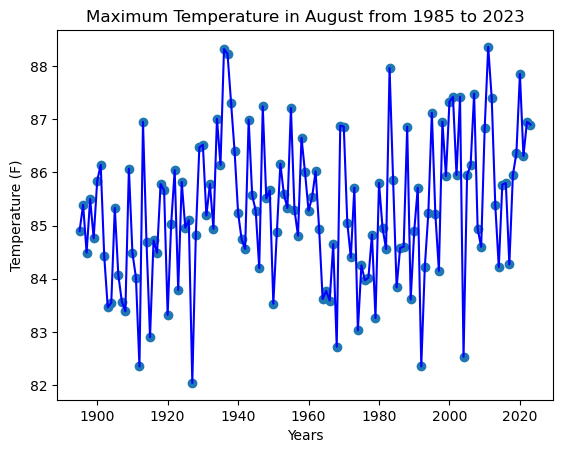

In [9]:
plt.scatter(t_i, d_i, label='data points')
plt.plot(t_i, d_i, linestyle='-', color='blue', label='lines')
plt.xlabel('Years')
plt.ylabel('Temperature (F)')
plt.title('Maximum Temperature in August from 1985 to 2023')

### Next, we want to project our data on a trend model of the form:  
### $d_i = \mu + (t_i - \bar{t})\cdot m$

This is a linear model, where m is the slope and $\mu$ is the y-intercept. We need to use the following equations to solve for $\mu$ and m. 

$m=\frac{SS_{xy}}{SS_{xx}}$    
where $SS_{xy}$ is the sum of cross deviations of y and x: 
$\sum_{i=1}^{n}y_ix_i-n\bar{x}\bar{y}$

and $SS_{xx}$  is the sum of squared deviations of x: $\sum_{i=1}^{n}(x_i-\bar{x})^2$

$\mu$ the y-intercept is obtained by the equation: 
$\mu = \bar{y} - m\bar{x}$

in our case x = $t_i$ and y = $d_i$

so $m = \frac{\sum_{i=1}^{n}(t_i -\bar{t})(d_i-\bar{d})}{\sum_{i=1}^{n}(t_i-\bar{t})^2}$

and $\mu = \bar{d} - m*\bar{t}$


https://www.geeksforgeeks.org/linear-regression-python-implementation/

In [17]:
# model di = μ + (ti − t)m
# calculate the differences (t_i - t_mean) and (d_i - d_mean)

t_bar = np.mean(t_i)
t_diff = t_i - t_bar

d_bar = np.mean(d_i)
d_diff = d_i - d_bar

#solve for the slope m, using the formula above

m = np.sum(t_diff * d_diff) / np.sum(t_diff ** 2)

mu = d_bar - m * t_bar

#project the temperature values (d_i) on the linear model, 
#using our coefficients: m and mu

projected_d_i = mu + (t_diff) * m

def estimate_coefficients(x, y):
    n = np.size(x)
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    
    x_diff = x - x_bar
    y_diff = y - y_bar
    
    SS_xy = np.sum(x_diff * y_diff)
    SS_xx = np.sum((x_diff)**2)
    
    m = SS_xy / SS_xx
    mu = y_bar - m * x_bar
    
    return(mu, m)

In [11]:
def plot_projected_line(x,y,b):
    x,y = np.array(x), np.array(y)
    plt.scatter(x, y, color='m', marker='o', s=30)
    
    y_pred = b[0] + b[1]*x
    
    plt.plot(x, y_pred, color='g')
    plt.xlabel('time')
    plt.ylabel('temperature')

In [21]:
b = estimate_coefficients(t_i, d_i)
print(b)

(68.27819819618364, 0.008696109123434716)


### $\mu$, the y-intercept is $ 68.3 $ and m, the slope is 0.008696

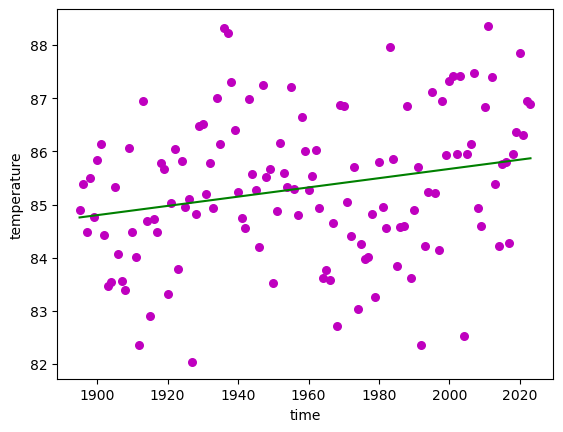

In [18]:
plot_projected_line(t_i, d_i, b)

### Error vector is $\vec{e} = \vec{\bar{d_i}} - \vec{d_i} $

In [28]:
error = d_bar - d_i
error_std = np.std(error)

In [29]:
print('The standard deviation of the components of the error vector is:', error_std)

The standard deviation of the components of the error vector is: 1.3579951650640143


### The standard deviation of the components of the error vector $\vec{e}$ is about 1.36